In [1]:
import os
from angstrom import Trajectory
import numpy as np

In [3]:
maindir = 'spring-test'
simlist = [os.path.join(maindir, i) for i in os.listdir(maindir)]

In [25]:
data = {'dx': [], 'dy': [], 'k': [], 'xstd': [], 'ystd': []}
for sim in simlist:
    traj = Trajectory(read=os.path.join(sim, 'traj.xyz'))
    com = traj.get_center()
    data['dx'].append(max(com[:, 0]) - min(com[:, 0]))
    data['dy'].append(max(com[:, 1]) - min(com[:, 1]))
    data['xstd'].append(np.std(com[:, 0]))
    data['ystd'].append(np.std(com[:, 1]))
    data['k'].append(float(os.path.basename(sim).split('-')[0]))

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
data['dx']

[0.023365502967642726,
 0.015705835378760469,
 0.022379237492554438,
 0.020246281151528933,
 0.020795605566728881,
 0.019681877780055146]

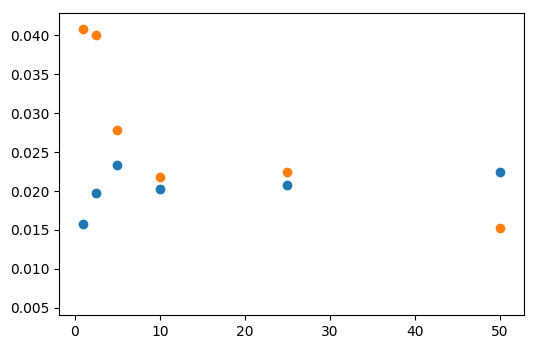

In [26]:
plt.scatter(data['k'], data['dx'])
plt.scatter(data['k'], data['dy'])

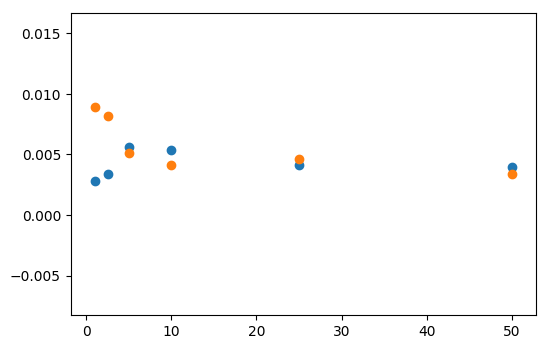

In [27]:
plt.scatter(data['k'], data['xstd'])
plt.scatter(data['k'], data['ystd'])